In [22]:
import csv
import math
import numpy as np
import cv2
from scipy import integrate
import matplotlib.pyplot as plt

# Orientation from integration
We will use cummalative trapezoid integration method

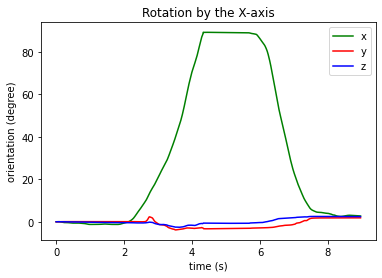

In [30]:
fileName = "VID_20220617_142807"

gyroX = []
gyroY = []
gyroZ = []
time = []
dt = 1/400 #400Hz

data_file = open('visualization/data/X_rotation/' + fileName + 'gyro.csv',  'r')
orientation_file = open('visualization/data/X_rotation/' + fileName + 'orientation.csv',  'w+', newline="")

data_reader = csv.reader(data_file)
writer = csv.writer(orientation_file)

t_init = 0
t_final = 0
counter = 0

for row in data_reader:
    gyroX.append(float(row[0]))
    gyroY.append(float(row[1]))
    gyroZ.append(float(row[2]))
    time.append(int(row[3]))
    
    t_final = int(row[3])
    counter += 1
    if t_init == 0:
        t_init = int(row[3])


x = np.linspace(0, abs(t_final - t_init)/1e9, num=counter)
X_int = -integrate.cumtrapz(gyroX, dx=dt, initial=0)
Y_int = -integrate.cumtrapz(gyroY, dx=dt, initial=0)
Z_int = -integrate.cumtrapz(gyroZ, dx=dt, initial=0)
plt.plot(x, X_int*(180/math.pi), color="g", label="x")
plt.plot(x, Y_int*(180/math.pi), color="r", label="y")
plt.plot(x, Z_int*(180/math.pi), color="b", label="z")
plt.xlabel('time (s)')
plt.ylabel('orientation (degree)') 
plt.legend()
plt.title("Rotation by the X-axis")
plt.show()


for i in range(len(time)):
    writer.writerow([X_int[i]*(180/math.pi), Y_int[i]*(180/math.pi), Z_int[i]*(180/math.pi), time[i]])

data_file.close()
orientation_file.close()